<a href="https://colab.research.google.com/github/deepti4bhatia/machine-learning/blob/master/supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SIMPLE LINEAR REGRESSION**
In this regression task we will predict the percentage of marks that a 
student is expected to score based upon the
number of hours they studied.
 This is a simple linear
regression task as it involves just two variables.

**IMPORTING ALL NECESSARY LIBRARIES**




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


 **READING DATASET USING PANDAS**


In [2]:
student_data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print(student_data)


    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


**PRINTING TOP 10 ROWS DATA USING HEAD**

In [3]:
student_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
student_data.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**DESCRIBNG BASIC STATISTICAL DATAILS OF A DATAFRAME**

In [5]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**DETERMINING OCCURENCE OF HOURS STUDIED**

In [6]:
student_data['Hours'].value_counts()

2.5    2
2.7    2
3.8    1
8.5    1
3.5    1
1.5    1
5.5    1
4.5    1
5.9    1
6.1    1
7.7    1
1.9    1
1.1    1
4.8    1
8.3    1
8.9    1
7.4    1
7.8    1
5.1    1
3.2    1
9.2    1
3.3    1
6.9    1
Name: Hours, dtype: int64

**DETERMING COLUMN-WISE SUM OF MISSING VALUES**

In [15]:
print(student_data['Hours'].isnull().sum())
print(student_data['Scores'].isnull().sum())

0
0


**VISUALIZING OF DATA THROUGH PLOTTING OF GRAPH**

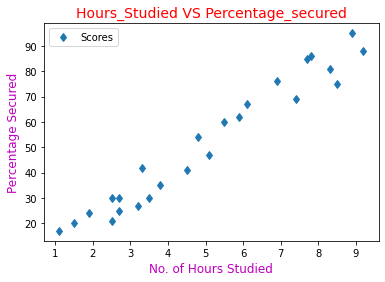

In [7]:
student_data.plot(x='Hours', y='Scores', style='d')
plt.title('Hours_Studied VS Percentage_secured', color='r' , fontsize=14)
plt.xlabel('No. of Hours Studied', color='m', fontsize=12)
plt.ylabel('Percentage Secured', color='m', fontsize=12)
plt.show()

The graph above shows the positive linear regression between x-axis & y-axis i.e the no.of hours studied and precentage secured.


**PREPARING THE DATA**

Dividing the data between attributes(inputs) & labels(outputs)

In [9]:
x = student_data.iloc[:, :-1].values
y = student_data.iloc[:, 1].values

**SPLITING OF DATA**

Now that we have our attributes and labels, the next step is to split this data into training and test sets.

From Scikit-Learn's library (which we have imported at the begining)

Using built-in train_test_split() method:

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0)

**TRAINING THE ALGORITHM**

After the splitting of our data into training and tests sets , we can train our algorithm

From Scikit-Learn's library (which we have imported at the begining)

Using built-in LinearRegression method:

**Linear Regression is used because there exists only one dependent variable(percentage secured) and one independent variable(no. of hours studied) and it is linear as suggested from graph plotted** 

In [12]:
test = LinearRegression()
print(test.fit(x_train, y_train))

print('Training is Completed')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Training is Completed


**PLOTTING REGRESSION LINE**

In [13]:
line = test.coef_*x+test.intercept_
print(line)

[[26.79480124]
 [52.56250809]
 [33.73226078]
 [86.25874013]
 [36.70545772]
 [16.88414476]
 [93.19619966]
 [56.52677068]
 [84.27660883]
 [28.77693254]
 [78.33021494]
 [60.49103328]
 [46.6161142 ]
 [34.72332643]
 [12.91988217]
 [90.22300272]
 [26.79480124]
 [20.84840735]
 [62.47316457]
 [75.357018  ]
 [28.77693254]
 [49.58931115]
 [39.67865467]
 [70.40168976]
 [79.32128059]]


**PLOTTING OF TEST DATA**

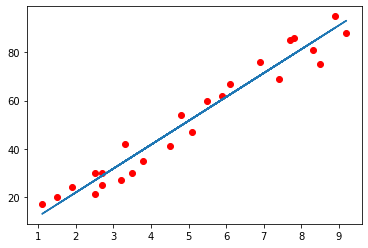

In [14]:
plt.scatter(x, y, color='r')
plt.plot(x, line)
plt.show()

**MAKING PREDICTIONS**

In [15]:
print(x_test) #testing data- in hours
y_pred = test.predict(x_test) #predicting scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


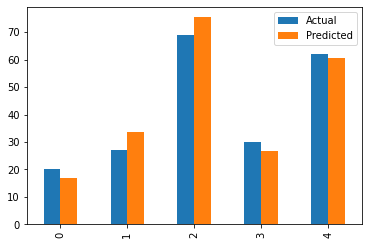

In [17]:
data.plot(kind='bar', label='Actual')

**CHECKING THE ACCURACY OF ALGORITHM**

In [18]:
#from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9454906892105354

**TESTING WITH OWN OWN DATA**

In [19]:
hours = np.array([9.25])
hours = hours.reshape(-1,1)
own_pred = test.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


**EVALUATING THE MODEL** 
This step is performed to evaluate the performance of algorithm . It is important to compare how different algorithms perform on a particular dataset. Out of various metrics , we have chosen mean square error and mean absolute error.

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE=mean_absolute_error(y_test,y_pred)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print("Mean Absolute Error=",MAE)
print("Root Mean Square Error=",RMSE)
#print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))
#print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error= 4.183859899002982
Root Mean Square Error= 4.647447612100373


**Hence, prediction of percentage secured based on no.of hours studied is performed using simple linear regression.**